In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import tree
import joblib
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.2'
# spark_version = 'spark-3.<enter version>'
# os.environ['SPARK_VERSION']=spark_version
# # Install Spark and Java
# !apt-get update
# !apt-get install openjdk-11-jdk-headless -qq > /dev/null
# !wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
# !tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
# # Set Environment Variables
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
# os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"
# # Start a SparkSession
# import findspark
# findspark.init()
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("Q1").getOrCreate()

In [2]:
# Mapping lets you format an entire DataFrame
products = "Data/products.csv"
products_df = pd.read_csv(products)
products_df.head()

,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR, WATER, BROWN S..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR, WATER, SUGAR, ..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR, SKIM MILK, WATER, SUGAR, ..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR, WATER, CORN S..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR, SUGAR, ..."


In [3]:
products_trim_df = products_df.drop(columns=['description'])
# products_trim_df=products_trim_df.reset_index(drop=True, inplace=True)
products_trim_df.to_csv("Data/products_trim.csv", index=False)

In [4]:
ingredient_list = products_trim_df.ingredients.unique()
unique_ingredient_dict = {}
    # Iterate through the outer list
for ingredient in ingredient_list:
    i = ingredient.split(', ')
    for i_list in i:
        if i_list != "":
            if i_list not in unique_ingredient_dict:
                    unique_ingredient_dict[i_list]=1
            else:
                    unique_ingredient_dict[i_list]=unique_ingredient_dict[i_list]+1
# print(unique_ingredient_dict)
    

In [5]:
sorted(unique_ingredient_dict.items(),key=lambda x:x[1],reverse=True)
# type(sorted(unique_ingredient_dict.items(),key=lambda x:x[1],reverse=True))

[('SUGAR', 309),
 ('CREAM', 250),
 ('SALT', 215),
 ('NATURAL FLAVOR', 165),
 ('SKIM MILK', 162),
 ('SOY LECITHIN', 158),
 ('COCONUT OIL', 145),
 ('CORN SYRUP', 140),
 ('WATER', 132),
 ('EGG YOLKS', 126),
 ('VANILLA EXTRACT', 118),
 ('MILK', 115),
 ('COCOA', 99),
 ('GUAR GUM', 82),
 ('WHEAT FLOUR', 75),
 ('BAKING SODA', 72),
 ('BUTTER', 71),
 ('CARRAGEENAN', 63),
 ('PECTIN', 62),
 ('CHOCOLATE', 62),
 ('WHEY', 62),
 ('VEGETABLE GUMS', 62),
 ('LIQUID SUGAR', 60),
 ('SOYBEAN OIL', 58),
 ('COCOA BUTTER', 57),
 ('MONO AND DIGLYCERIDES', 56),
 ('CAROB BEAN', 50),
 ('GUAR', 49),
 ('COCOA PROCESSED WITH ALKALI', 45),
 ('DEXTROSE', 45),
 ('CAROB BEAN GUM', 44),
 ('MOLASSES', 35),
 ('PEANUTS', 31),
 ('VITAMIN A PALMITATE', 30),
 ('DUTCHED COCOA', 30),
 ('CANOLA OIL', 29),
 ('CANE SUGAR', 29),
 ('BROWN SUGAR', 28),
 ('CORN STARCH', 28),
 ('NATURAL FLAVORS', 28),
 ('EGGS', 27),
 ('PEANUT OIL', 27),
 ('MILK FAT', 26),
 ('PALM OIL', 26),
 ('COCOA POWDER', 24),
 ('ANNATTO', 24),
 ('TARA', 24),
 ('LEMO

In [6]:
len(unique_ingredient_dict)

414

In [7]:
# df.loc[df["rating"] > 4.5] # this will return everything that higher 4.5

In [8]:
unique_ingredient_df = pd.DataFrame.from_dict({'Ingredients': unique_ingredient_dict.keys(), 'Count': unique_ingredient_dict.values()})
# unique_ingredient_df
# sorted_unique_ingredients = unique_ingredient_df.sort_values(by=['Count'],ascending=False)
# sorted_unique_ingredients

In [9]:
unique_ingredient_df.to_csv("Data/ingredients.csv")

In [10]:
final_ingredients = "Data/finalingredients.csv"
final_ingredients_df = pd.read_csv(final_ingredients)

In [11]:
final_ingredients_df

,Ingredients,Count
0,SUGAR,309
1,CREAM,250
2,SALT,215
3,SKIM MILK,162
4,SOY LECITHIN,158
...,...,...
59,MANGO,1
60,PEANUT BUTTER,1
61,PINEAPPLE,1
62,RAISINS,1


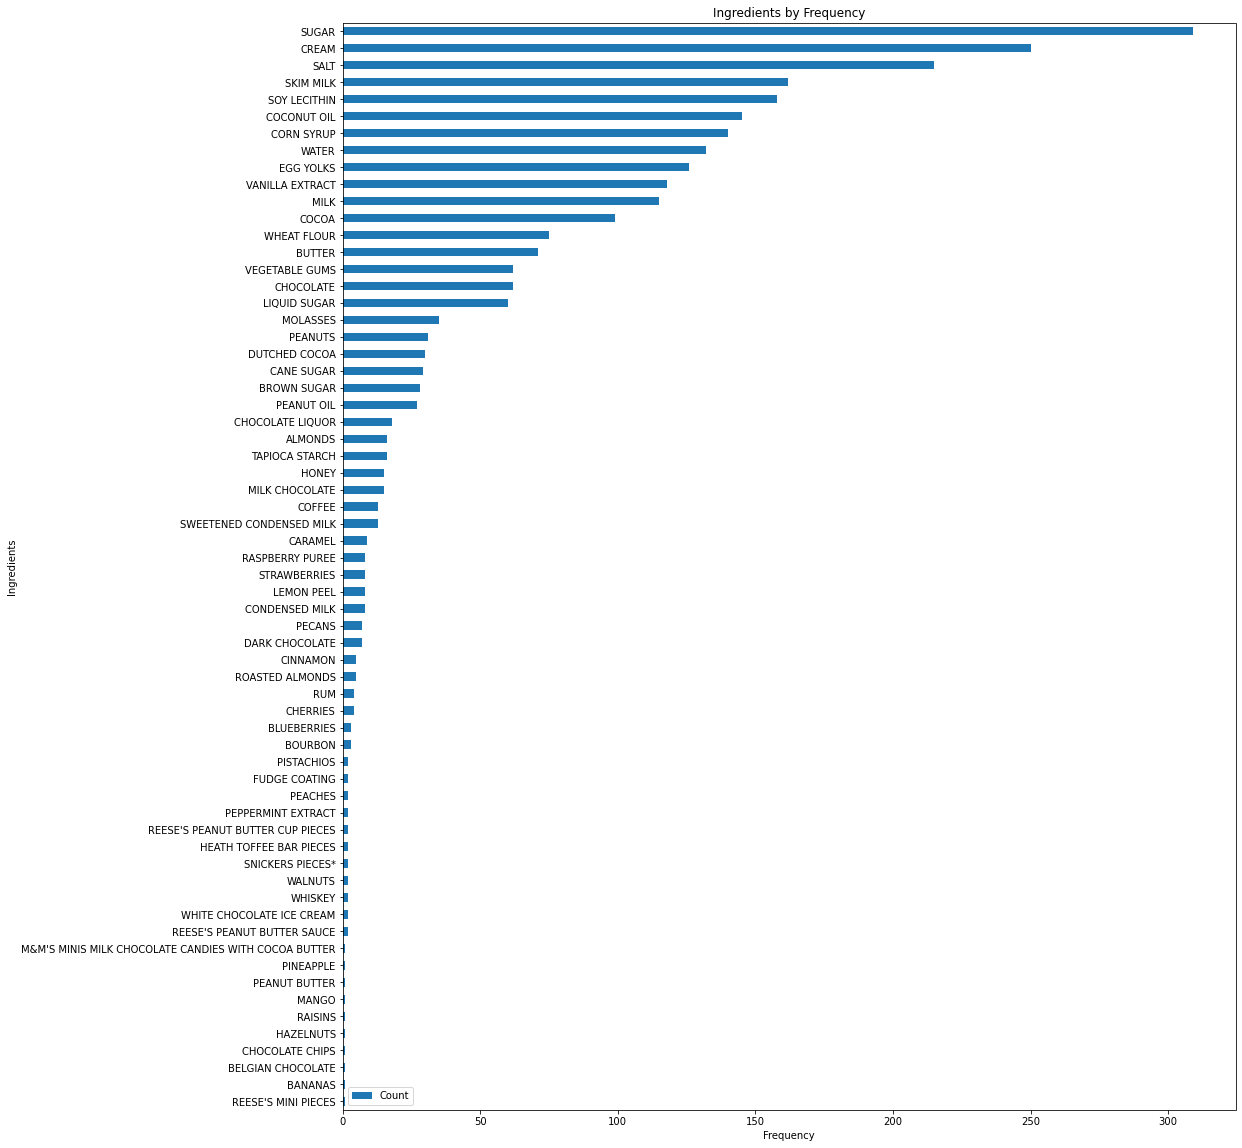

In [13]:
# final_ingredients_df.plot.barh(x='Ingredients',y='Count',figsize=(20, 16),ascending=False)
# df.plot.bar(x='lab', y='val', rot=0)
final_ingredients_df=final_ingredients_df.sort_values(by=['Count'], ascending=True)
final_ingredients_df.plot.barh(x='Ingredients',y='Count', figsize=(16,20))
plt.xlabel("Frequency")
plt.ylabel("Ingredients")
plt.title("Ingredients by Frequency")
plt.savefig("Data/ingredients_frequency.png")

In [14]:
model = "Data/final_model.csv"
model_df = pd.read_csv(model)
y_df = model_df["rating"] #saving labels
model_df

,rating,SUGAR,CREAM,SALT,SKIM MILK,SOY LECITHIN,COCONUT OIL,CORN SYRUP,WATER,EGG YOLKS,...,BANANAS,BELGIAN CHOCOLATE,CHOCOLATE CHIPS,HAZELNUTS,M&M'S MINIS MILK CHOCOLATE CANDIES WITH COCOA BUTTER,MANGO,PEANUT BUTTER,PINEAPPLE,RAISINS,REESE'S MINI PIECES
0,3.7,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3.6,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4.5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4.0,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
237,4.7,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
238,2.5,1,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
239,3.2,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# model_df.set_index("rating", inplace=True)
# # model_df.iloc[:100,11:20].plot(figsize=(20,12),style="o")
# model_df.iloc[:100,11:20].plot.bar(figsize=(20,12))

In [16]:
model_df

,rating,SUGAR,CREAM,SALT,SKIM MILK,SOY LECITHIN,COCONUT OIL,CORN SYRUP,WATER,EGG YOLKS,...,BANANAS,BELGIAN CHOCOLATE,CHOCOLATE CHIPS,HAZELNUTS,M&M'S MINIS MILK CHOCOLATE CANDIES WITH COCOA BUTTER,MANGO,PEANUT BUTTER,PINEAPPLE,RAISINS,REESE'S MINI PIECES
0,3.7,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3.6,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4.5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4.0,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
237,4.7,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
238,2.5,1,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
239,3.2,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Xvalues=model_df

# Yvalues=y_df["rating"]

# plt.scatter(Xvalues,Yvalues)
# plt.xlabel('Ingredients')
# plt.ylabel('Ratings')
# plt.show()

In [18]:
X = model_df.drop("rating", axis=1)
y= model_df["rating"].values.reshape(-1, 1)
print(X.shape, y.shape)
model_df = model_df.astype(float)
model_df

(241, 64) (241, 1)


,rating,SUGAR,CREAM,SALT,SKIM MILK,SOY LECITHIN,COCONUT OIL,CORN SYRUP,WATER,EGG YOLKS,...,BANANAS,BELGIAN CHOCOLATE,CHOCOLATE CHIPS,HAZELNUTS,M&M'S MINIS MILK CHOCOLATE CANDIES WITH COCOA BUTTER,MANGO,PEANUT BUTTER,PINEAPPLE,RAISINS,REESE'S MINI PIECES
0,3.7,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,4.7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,2.5,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,3.2,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5076981362475776
Testing Score: -245873292001340.4


In [21]:
# # plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# predictions = model.predict(X_test)
# plt.scatter(predictions, predictions - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot")

In [22]:
# from sklearn.metrics import mean_squared_error

# MSE = mean_squared_error(y_test, predictions)
# r2 = model.score(X_test, y_test)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train.reshape(len(y_train),))
print(rf.score(X_test, y_test.reshape(len(y_test),)))
print(rf.score(X_train, y_train.reshape(len(y_train),)))

-0.053275530905122936
0.8334539456727812


In [24]:
# import numpy as np
temp = X_train.to_numpy()

# temp = np.array([1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
#        0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
#        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
#        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [25]:
rf.predict([temp[0]])

array([3.29378571])

In [26]:
joblib.dump(rf, "code/rf.joblib")

['code/rf.joblib']

In [27]:
loaded_rf = joblib.load("code/rf.joblib")

In [28]:
print([temp])

[array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0]], dtype=int64)]


In [29]:
loaded_rf.predict([temp[0]])

array([3.29378571])